# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [171]:
#import pandas and matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt


In [172]:
#Load data 
df = pd.read_csv('train.csv')
# df.head()

In [173]:
#explore measures of centrality and dispersion - variable 1 - crime
crim_mean = df.crim.mean()
crim_median = df.crim.median()
crim_std = df.crim.std()
crim_min = df.crim.min()
crim_max = df.crim.max()
print('crime mean ' + str(crim_mean))
print('crime median ' + str(crim_median))
print('crime std ' + str(crim_std))
print('crime max ' + str(crim_max))
print('crime min ' + str(crim_min))

crime mean 3.360341471471471
crime median 0.26169000000000003
crime std 7.352271836781107
crime max 73.5341
crime min 0.00632


In [174]:
#explore measures of centrality and dispersion - variable 2 - age
age_mean = df.age.mean()
age_median = df.age.median()
age_std = df.age.std()
age_min = df.age.min()
age_max = df.age.max()
print('age mean ' + str(age_mean))
print('age median ' + str(age_median))
print('age std ' + str(age_std))
print('age max ' + str(age_max))
print('age min ' + str(age_min))


age mean 68.22642642642643
age median 76.7
age std 28.13334360562339
age max 100.0
age min 6.0


In [175]:
#explore measures of centrality and dispersion - variable 3 - lower status of the population (lstat)
lstat_mean = df.lstat.mean()
lstat_median = df.lstat.median()
lstat_std = df.lstat.std()
lstat_min = df.lstat.min()
lstat_max = df.lstat.max()
print('lstat mean ' + str(lstat_mean))
print('lstat median ' + str(lstat_median))
print('lstat std ' + str(lstat_std))
print('lstat max ' + str(lstat_max))
print('lstat min ' + str(lstat_min))

lstat mean 12.515435435435437
lstat median 10.97
lstat std 7.067780803585785
lstat max 37.97
lstat min 1.73


In [176]:
# Create meaningful subsets of the data, 1
# I chose to split the data set top/bottom based upon crime to see if I could find any patterns
# in their respective crime rates. 
# I chose the median(0.26) rather than the mean(3.36) 
# because it is obvious that the mean is being effected by outliers. 
# I think this is a meaning full split because in looking at the mean and median of the top and bottom 
# the bottom's numbers are stable, mean and median being relatively close, where in the top half, we have a 
# rather large (almost by half) difference between the mean and median.
# I think this large discrepancy would warrant further investigation.  
top_half_crim = df.loc[df['crim'] > df.crim.median(), ['crim']]
sorted_top_half_crim = top_half_crim.sort_values('crim', ascending=False)
bottom_half_crim =  df.loc[df['crim'] < df.crim.median(), ['crim']]
sorted_bottom_half_crim = bottom_half_crim.sort_values('crim', ascending=True)
print('bottom mean ' + str(sorted_bottom_half_crim['crim'].mean()))
print('top mean ' + str(sorted_top_half_crim['crim'].mean()))
print('bottom median ' + str(sorted_bottom_half_crim['crim'].median()))
print('top median ' + str(sorted_top_half_crim['crim'].median()))
sorted_top_half_crim.head()


bottom mean 0.0949751204819277
top mean 6.6443743975903615
bottom median 0.07885500000000001
top median 3.6856649999999997


,crim
271,73.5341
268,45.7461
261,38.3518
275,37.6619
267,28.6558


In [198]:
# Create meaningful subsets of the data, 2
# Here I split the data frame in to areas were less than 25% of the houses were built
# before 1940 and areas were more than 25% of the houses where built after 1940, and looked
# at the mean and median house value. I was expecting a large difference between the but found that
# though the mean and median house value was higher in the new areas, not as much as I expected. 
new_house_cost = df.loc[df['age'] < 25, ['medv']]
old_house_cost = df.loc[df['age'] > 25, ['medv']]
print('new house area cost mean ' + str(round(new_houses_cost['medv'].mean(), 2)))
print('new house area cost median ' + str(round(new_houses_cost['medv'].median(), 2)))
print('old house area cost mean ' + str(round(old_houses_cost['medv'].mean(), 2)))
print('old house area cost median ' + str(old_houses_cost['medv'].median()))

df.head()

new house area cost mean 28.07
new house area cost median 25.2
old house area cost mean 22.19
old house area cost median 20.55


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [199]:
#Create meaningful subsets of the data, 3
# Here I split the data set into two subsets by percentage of residential land zoned for lots over 25,000ft, and 
# and looked at the mean and median house values. I was surprised to see that the small plot group had houses values
# significantly higher than the large plot group. 
large_plot_house_value = df.loc[df['zn'] < 50, ['medv']]
small_plot_house_value = df.loc[df['zn'] > 50, ['medv']]
print('large plot house value mean ' + str(round(large_plot_house_value['medv'].mean(), 2)))
print('large plot house value median ' + str(round(large_plot_house_value['medv'].median(), 2)))
print('small plot house value ' + str(round(small_plot_house_value['medv'].mean(), 2)))
print('small plot house value ' + str(round(small_plot_house_value['medv'].median(), 2)))


large plot house value mean 22.2
large plot house value median 20.75
small plot house value 29.24
small plot house value 28.5


Text(0.5,1,'Crime rates by town bottom half')

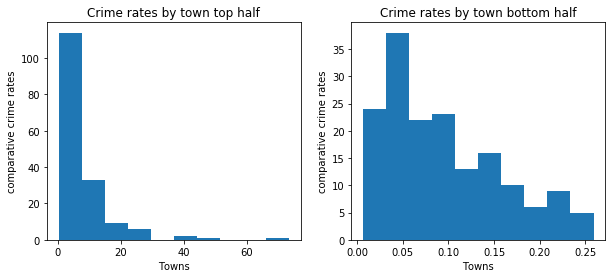

In [193]:
# use histograms and scatterplots to see whether you observe differences for the subsets of the data - 1
# I know these plots are wrong, especially the x and y ticks, but after many hours I just don't know how to fix them.
new_figure = plt.figure(figsize=(10, 4))
ax = new_figure.add_subplot(121)
ax1 = new_figure.add_subplot(122)

ax.hist(top_half_crim['crim'])
ax1.hist(bottom_half_crim['crim'])

ax.set_ylabel('comparative crime rates')
ax.set_xlabel('Towns')
ax.set_title('Crime rates by town top half')

ax1.set_ylabel('comparative crime rates')
ax1.set_xlabel('Towns')
ax1.set_title('Crime rates by town bottom half')







Text(0.5,1,'comparative house values by age of area')

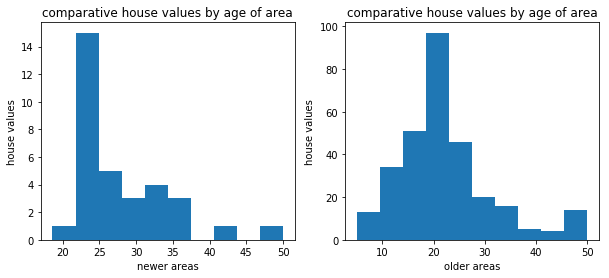

In [202]:
# use histograms and scatterplots to see whether you observe differences for the subsets of the data - 2
# again my ticks are off, just don't know how to fix them
new_figure = plt.figure(figsize=(10, 4))
ax = new_figure.add_subplot(121)
ax1 = new_figure.add_subplot(122)

ax.hist(new_house_cost['medv'])
ax1.hist(old_house_cost['medv'])


ax.set_ylabel('house values')
ax.set_xlabel('newer areas')
ax.set_title('comparative house values by age of area')

ax1.set_ylabel('house values')
ax1.set_xlabel('older areas')
ax1.set_title('comparative house values by age of area')

Text(0.5,1,'comparative house values by plot zoning')

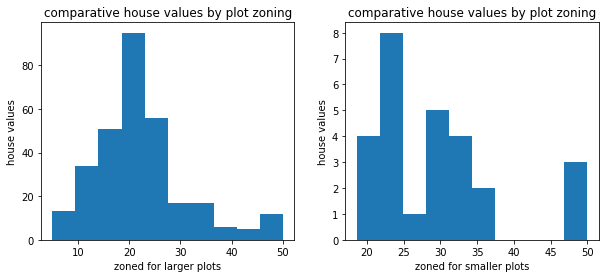

In [204]:
# use histograms and scatterplots to see whether you observe differences for the subsets of the data - 2
# ticks are off

new_figure = plt.figure(figsize=(10, 4))
ax = new_figure.add_subplot(121)
ax1 = new_figure.add_subplot(122)

ax.hist(large_plot_house_value['medv'])
ax1.hist(small_plot_house_value['medv'])

ax.set_ylabel('house values')
ax.set_xlabel('zoned for larger plots')
ax.set_title('comparative house values by plot zoning')

ax1.set_ylabel('house values')
ax1.set_xlabel('zoned for smaller plots')
ax1.set_title('comparative house values by plot zoning')


# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!